# Exploratory Data Analysis

**Goal**

Discover patterns and relevant info before building a Machine Learning pipeline with data processing and modeling.

**Data**

According to the <a href="https://drive.google.com/drive/folders/1Z1j6uzzCOgjB2a6i3Ym1pmJRsasfm7cD">original source</a>, the table below provides a dictionary outlining what each column in the dataset represents.


| Column Name | Meaning / Business Logic |
| :--- | :--- |
| **RA** | Unique student registration identifier (Registro do Aluno) |
| **ano_dados** | The reference year for the recorded data points |
| **fase** | The student's current learning level or phase. |
| **idade** | The age of the student in the reference year. |
| **genero** | Student's gender (demographic feature). |
| **anos_na_instituicao** | Duration (in years) the student has been part of Passos Mágicos. |
| **instituicao** | Type of educational institution the student attends (e.g., Public, Scholarship). |
| **pedra_atual** | Classification based on INDE score: Quartzo (2.4-5.5), Ágata (5.5-6.8), Ametista (6.8-8.2), or Topázio (8.2-9.2). |
| **inde_atual** | Educational Development Index: A weighted average of indicators (IAN, IDA, IEG, IAA, IPS, IPP, and IPV). |
| **indicador_auto_avaliacao** | **(IAA)**: Average of student self-assessment scores. |
| **indicador_engajamento** | **(IEG)**: Average of student engagement scores. |
| **indicador_psicossocial** | **(IPS)**: Average of student psychosocial assessment scores. |
| **indicador_aprendizagem** | **(IDA)**: Average of learning performance scores. |
| **indicador_ponto_virada** | **(IPV)**: Average score evaluating if the student reached the "Turning Point" milestone. |
| **indicador_adequacao_nivel** | **(IAN)**: Average score for student suitability for their current educational level. |
| **indicador_psico_pedagogico** | **(IPP)**: Average score of psychopedagogical evaluations. |
| **defasagem** | Current academic gap level recorded for the student. |
| **target_defasagem** | Shifted target variable for predictive modeling. |

### Table of Contents

1. [Setup and Data Loading](#Setup-and-Data-Loading)
2. [Categorical Features](#Categorical-Features)
3. [Continuous Features](#Continuous-Features)
4. [Target Variable](#Target-Variable)
5. [Correlation](#Correlation)
6. [Missing Data](#Missing-Data)
6. [Conclusion](#Conclusion)

## Setup and Data Loading

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

import warnings
warnings.filterwarnings('ignore')

# Settings and configurations
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
# Defining functions for Load and Describe Data
def display_feature_list(features, feature_type):
    '''
    This function displays the features within each list for each type of data
    '''

    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')


def describe_df(df):
    """
    This function prints some basic info on the dataset and 
    sets global variables for feature lists.
    """

    global categorical_features, continuous_features, binary_features
    categorical_features = [
        col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])
    ]
    
    binary_features = [col for col in df.columns if df[col].nunique(
    ) <= 2 and df[col].dtype != 'object']
    continuous_features = [
        col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])
    ]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary (0 or 1)')
    print(f'\nData Types: \n{df.dtypes}')
    print(
        f'\nMissing Data Percentage: \n{(df.isnull().sum() / len(df) * 100).round(2).astype(str) + "%"}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(
        f'\nCategorical Feature Cardinality: \n{df[categorical_features].nunique().sort_values(ascending=False)}')
    print(
        f'\nFeatures with Zero Variance: {", ".join([col for col in df.columns if df[col].nunique() == 1]) if any(df[col].nunique() == 1 for col in df.columns) else "None"}')

    negative_valued_features = [
        col for col in df[continuous_features] if (df[col] < 0).any()]
    print(
        f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    print('\nStatistical Summary: \n')
    display(df.describe().T)
    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [3]:
# load data
df = pd.read_parquet('../data/03_gold/feature_store.parquet')
display(describe_df(df))


DataFrame shape: (3030, 18)

3,030 samples

18 attributes

Categorical Features: 
genero, instituicao, pedra_atual

Continuous Features: 
RA, ano_dados, fase, idade, anos_na_instituicao, inde_atual, indicador_auto_avaliacao, indicador_engajamento, indicador_psicossocial, indicador_aprendizagem, indicador_ponto_virada, indicador_adequacao_nivel, indicador_psico_pedagogico, defasagem, target_defasagem

Binary (0 or 1) Features: 
None

Data Types: 
RA                              int64
ano_dados                       int64
fase                            int64
idade                           int64
genero                         object
anos_na_instituicao             int64
instituicao                    object
pedra_atual                    object
inde_atual                    float64
indicador_auto_avaliacao      float64
indicador_engajamento         float64
indicador_psicossocial        float64
indicador_aprendizagem        float64
indicador_ponto_virada        float64
indicador_adequac

,count,mean,std,min,25%,50%,75%,max
RA,3030.0,721.668647,438.591959,1.000,364.2500,689.500000,1057.000000,1661.000000
ano_dados,3030.0,2023.097690,0.809950,2022.000,2022.0000,2023.000000,2024.000000,2024.000000
fase,3030.0,2.557426,2.255364,0.000,1.0000,2.000000,4.000000,9.000000
idade,3030.0,12.527063,3.299273,7.000,10.0000,12.000000,15.000000,27.000000
anos_na_instituicao,3030.0,1.533993,1.624954,0.000,0.0000,1.000000,3.000000,7.000000
inde_atual,2845.0,7.269915,0.991767,3.032,6.6752,7.388267,7.986867,9.531325
indicador_auto_avaliacao,2865.0,7.918225,2.626209,0.000,7.9000,8.751000,9.500000,10.002000
indicador_engajamento,2954.0,7.945696,2.152281,0.000,7.3000,8.600000,9.400000,10.000000
indicador_psicossocial,2859.0,6.287129,1.792491,2.500,5.0200,7.500000,7.510000,10.000000
indicador_aprendizagem,2852.0,6.375964,1.956637,0.000,5.1000,6.666667,7.833333,10.000000



DataFrame Head: 



,RA,ano_dados,fase,idade,genero,anos_na_instituicao,instituicao,pedra_atual,inde_atual,indicador_auto_avaliacao,indicador_engajamento,indicador_psicossocial,indicador_aprendizagem,indicador_ponto_virada,indicador_adequacao_nivel,indicador_psico_pedagogico,defasagem,target_defasagem
0,1,2022,7,19,F,6,Pública,Quartzo,5.783,8.3,4.1,5.6,4.0,7.278,5.0,8.174,-1,0.0
1,1,2023,8,20,F,7,Bolsista,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0,0.0
2,1,2024,8,21,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,0,NaN
3,2,2022,7,17,F,5,Privada,Ametista,7.055,8.8,5.2,6.3,6.8,6.778,10.0,7.894,0,0.0
4,2,2023,8,18,F,6,Bolsista,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0,0.0



DataFrame Tail: 



,RA,ano_dados,fase,idade,genero,anos_na_instituicao,instituicao,pedra_atual,inde_atual,indicador_auto_avaliacao,indicador_engajamento,indicador_psicossocial,indicador_aprendizagem,indicador_ponto_virada,indicador_adequacao_nivel,indicador_psico_pedagogico,defasagem,target_defasagem
3025,1657,2024,9,20,M,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3026,1658,2024,9,21,M,3,Privada,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3027,1659,2024,9,21,M,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3028,1660,2024,9,24,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3029,1661,2024,9,21,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN


None

In [4]:
# Checking for unique RAs (ID values)
print(f"Unique RAs: {df['RA'].nunique()} out of {len(df)} total records")

Unique RAs: 1661 out of 3030 total records


**Conclusions from Data Inspection**
- **Missing Data (Target)**: `target_defasagem` has a high missing rate (55%), which is expected for the most recent data points (2024) and students who left the institution. We'll drop these missing values during training.
- **Missing Data (Features)**: Key indicators (e.g., `inde_atual`, `pedra_atual`) have ~6% nulls, while core demographics are nearly complete.
- **Data Ranges**: Most numerical indicators are on a 0-10 scale; however, `defasagem` and `target_defasagem` contain negative values representing academic delay.
- **Student Population**: The dataset covers 1,661 unique students (RAs) across 3,030 total observations.
- **Cardinality**: Categorical features like `instituicao`, `pedra_atual`, and `genero` have low cardinality, which will simplify categorical encoding.

## Categorical Features

In [5]:
# Categorical features plot
def bar_plot(df, column, color='navy'):
    """
    Performs univariate analysis by plotting the count of a single categorical feature.
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name to analyze.
        color (str): Color of the plots.
    """

    df_plot = df.copy()
    df_plot['ano_dados'] = df_plot['ano_dados'].astype(int)

    plt.figure(figsize=(14, 6))
        
    category_order = df[column].value_counts().index
        
    ax = sns.countplot(
        data=df_plot, 
        x=column, 
        hue='ano_dados', 
        order=category_order, 
        palette="viridis"
    )
    
    plt.title(f'Distribution of {column} Across Years', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='Year (ano_dados)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=9, xytext=(0, 5),
                        textcoords='offset points')

   
    plt.tight_layout()
    plt.show()

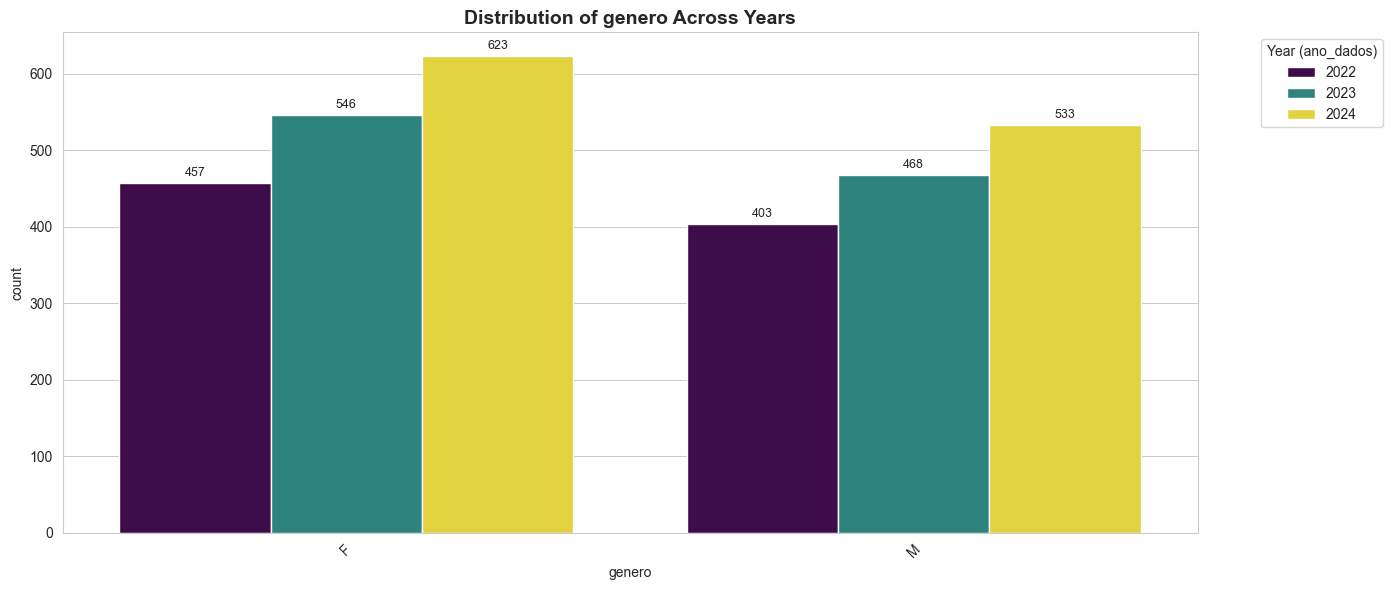

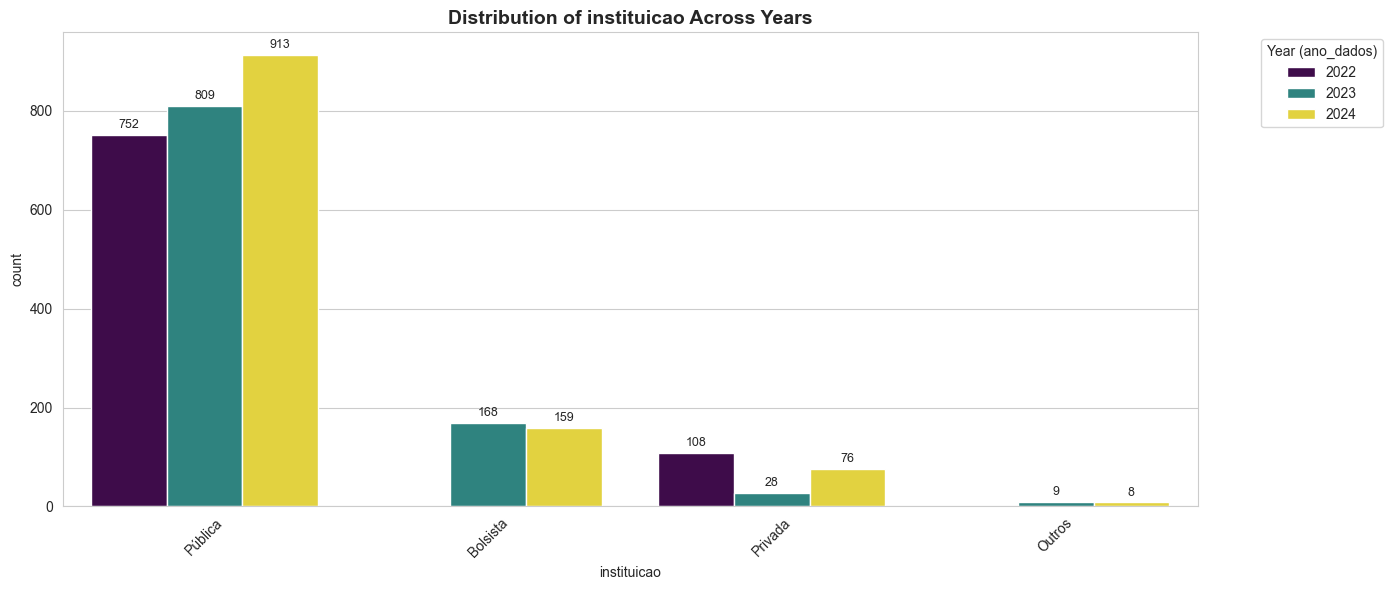

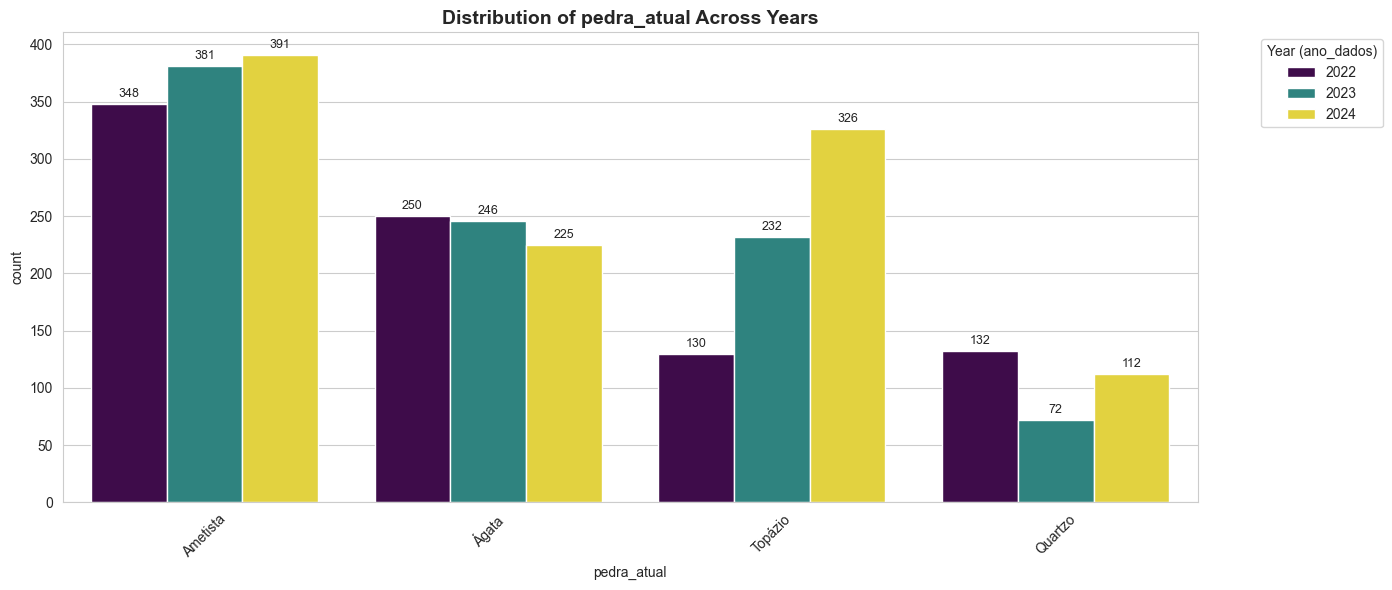

In [6]:
for col in categorical_features:
    bar_plot(df, col)

**Conclusions from Categorical Features Analysis**
- We have more female students than male students across all three years, with steady growth year-over-year across both genders.
- The vast majority of students come from public schools. These students represent the largest growth year-over-year. The number of students with scholarships or from private institutions are either stagnant or slightly decreasing.
- We can see a large growth in `Topázio` students YoY, which is a great indicator of the program's success. This is the highest tier of pedra classification based on INDE scores. 
- We can also notice a steady decrease in the number of students among the `Quartzo` and `Ágata` tiers over the years, which signal low performers. 
- Pedra counts YoY suggest upward mobility and improvements in student performance.

## Continuous Features

In [7]:
def plot_numerical_univariate_sns(df, feat):
    """
    Plots a boxplot and a histogram side-by-side for a continuous feature
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name to analyze.
    """
    df_plot = df.copy()
    df_plot['ano_dados'] = df_plot['ano_dados'].astype(int)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 2]})

    # Temporal Boxplot
    sns.boxplot(
        data=df_plot, 
        x=df_plot['ano_dados'], 
        y=feat, 
        ax=axes[0], 
        palette="viridis",
        showmeans=True,
        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"}
    )
    axes[0].set_title(f'Median & Variance per Year', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Year (ano_dados)')
    axes[0].set_ylabel(feat.replace('_', ' ').title())

    # KDE
    sns.kdeplot(
        data=df_plot, 
        x=feat, 
        hue=df_plot['ano_dados'], 
        ax=axes[1], 
        fill=True, 
        palette="viridis", 
        alpha=0.3,
        common_norm=False
    )
    axes[1].set_title(f'Distribution Density Comparison', fontsize=14, fontweight='bold')
    axes[1].set_xlabel(feat.replace('_', ' ').title())
    axes[1].set_ylabel('Density')

    plt.suptitle(f"Boxplot & KDE per Year: {feat.replace('_', ' ').title()}", 
                 fontsize=18, fontweight='bold', y=1.02)
    
    plt.tight_layout()
    plt.show()

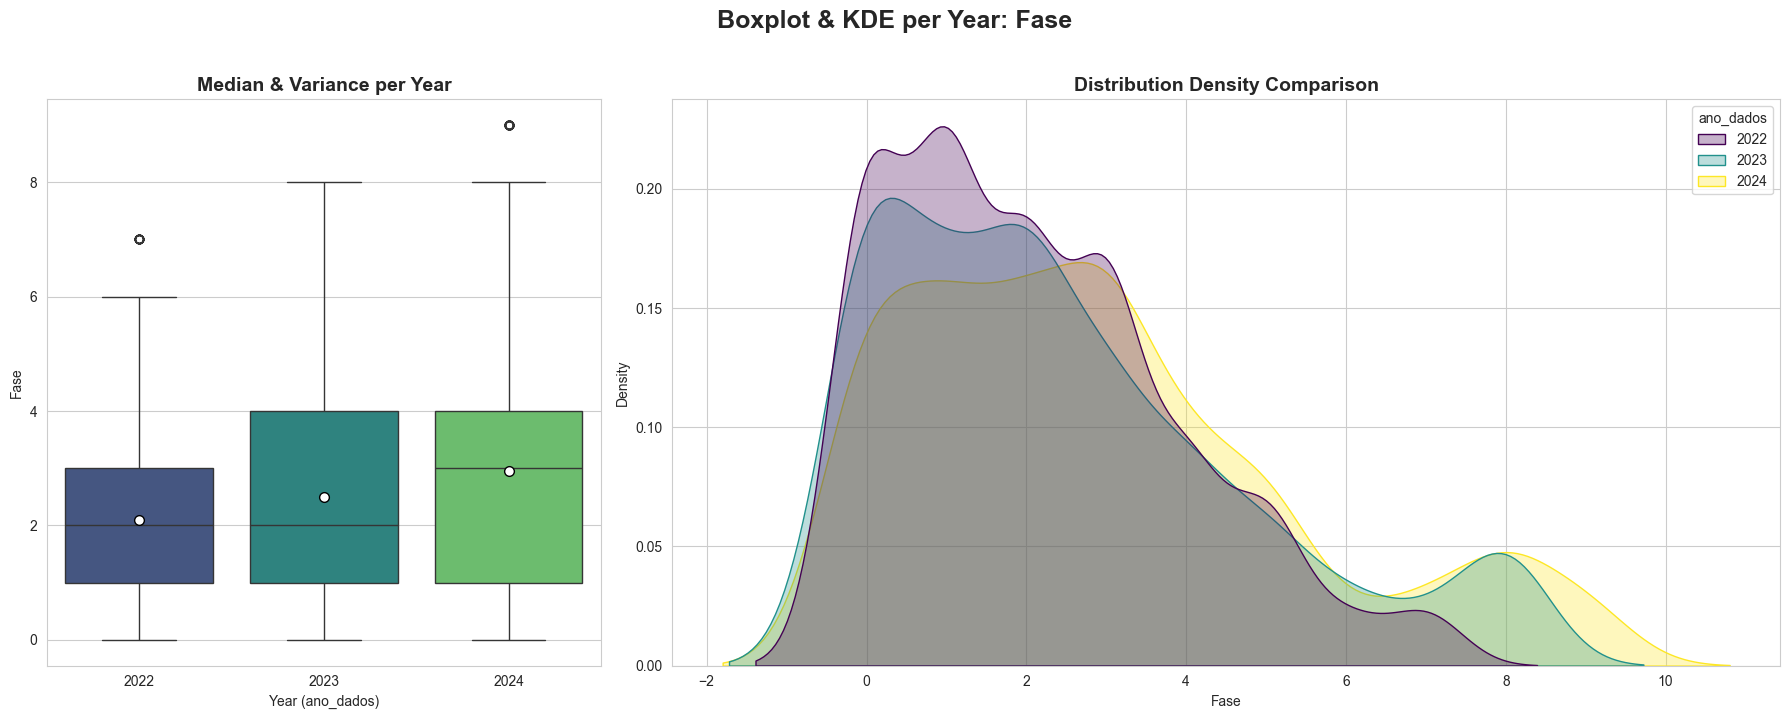

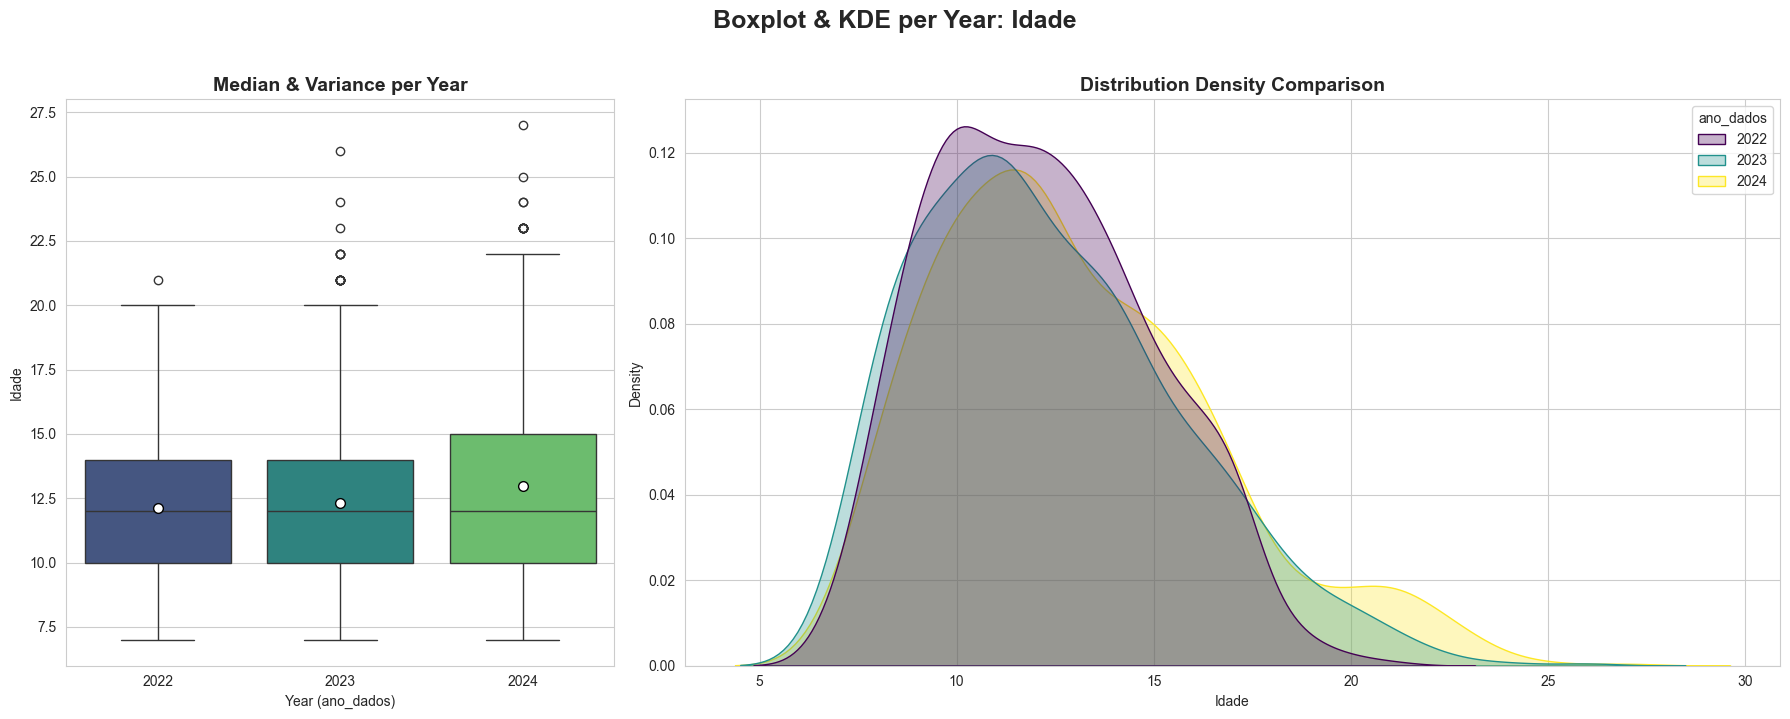

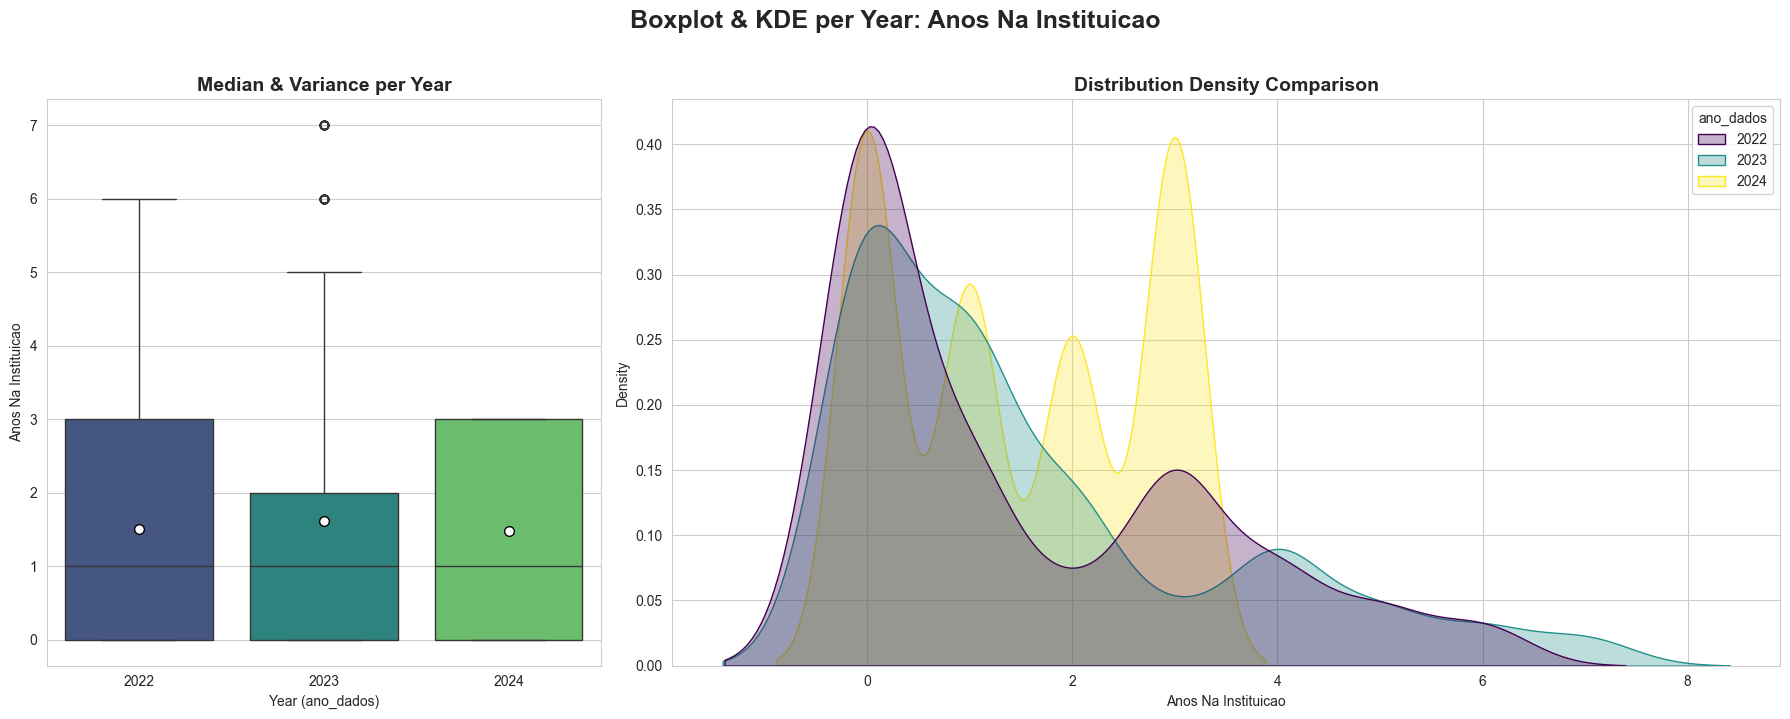

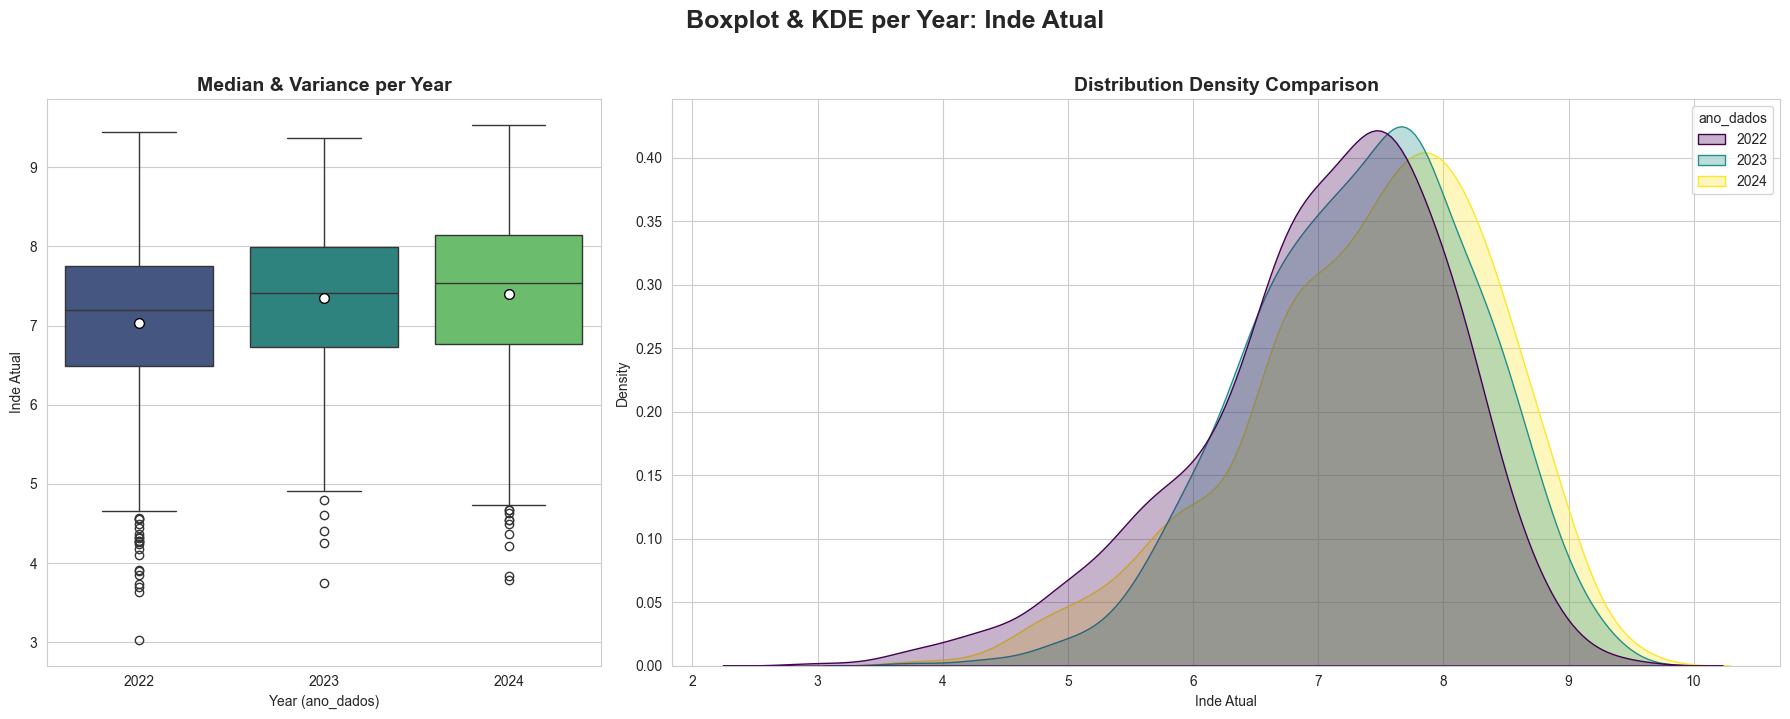

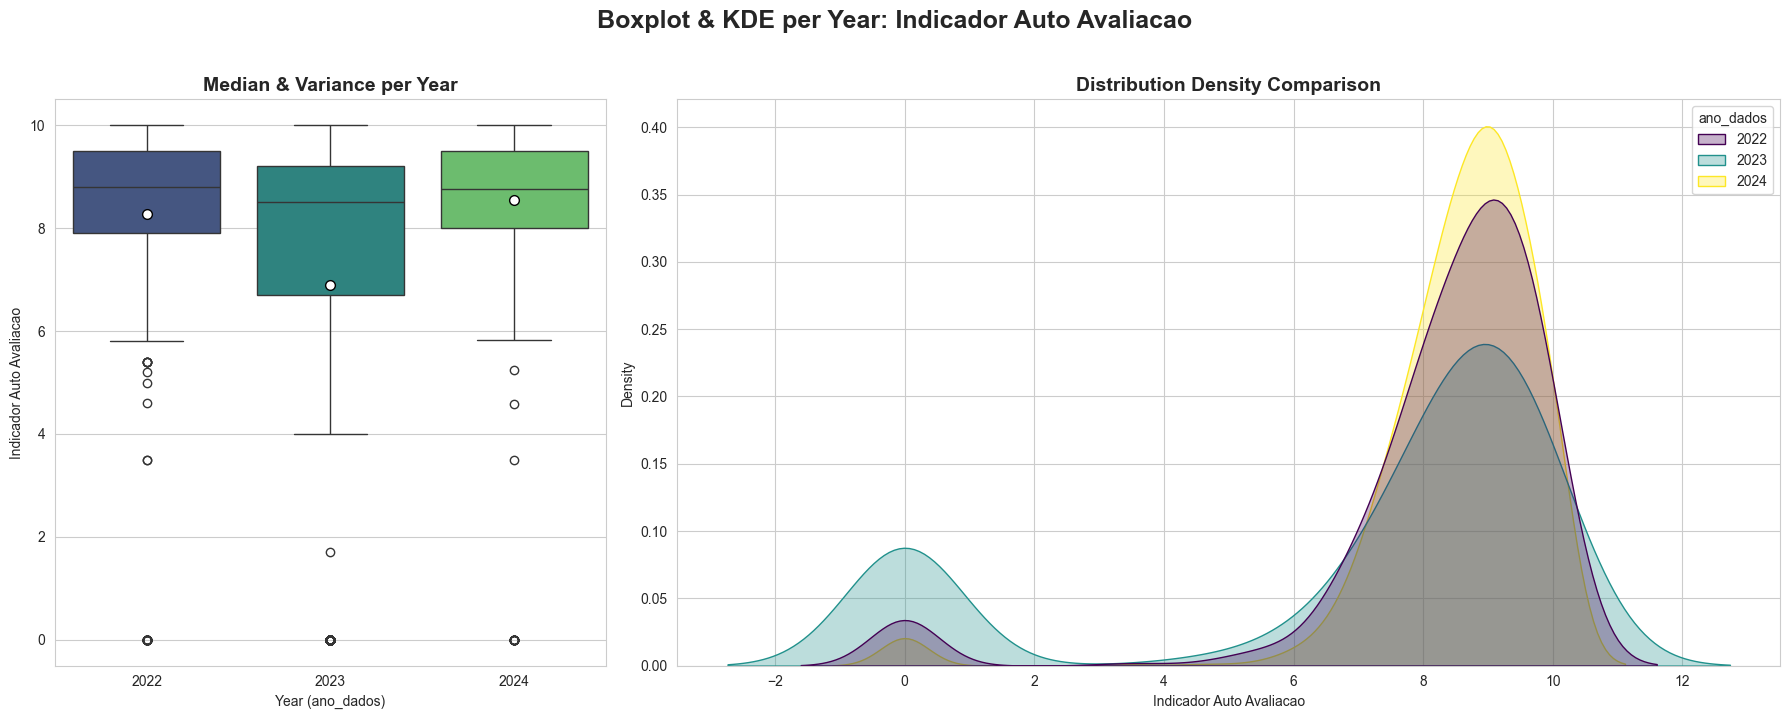

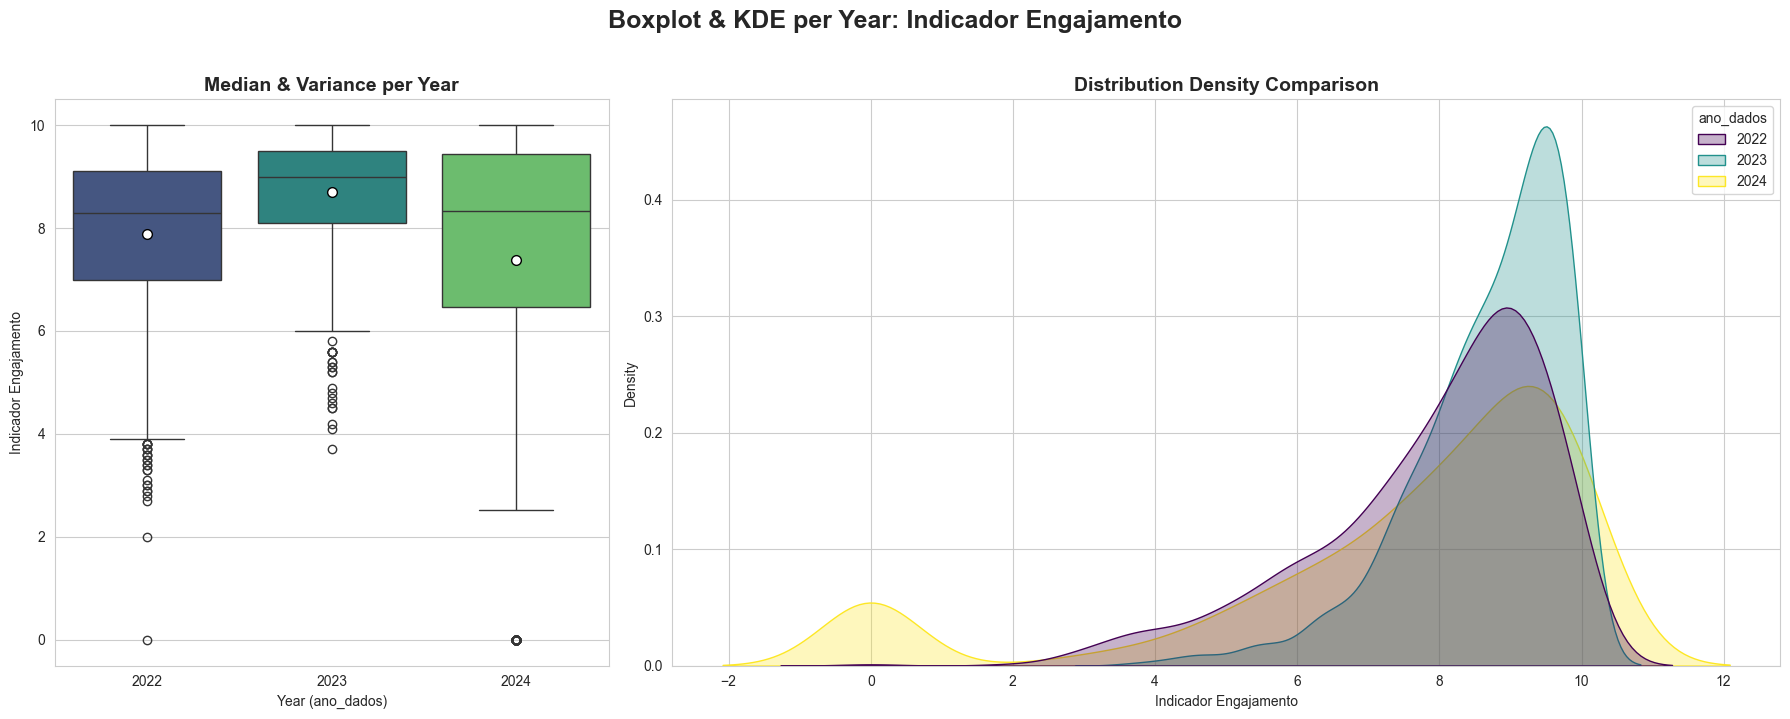

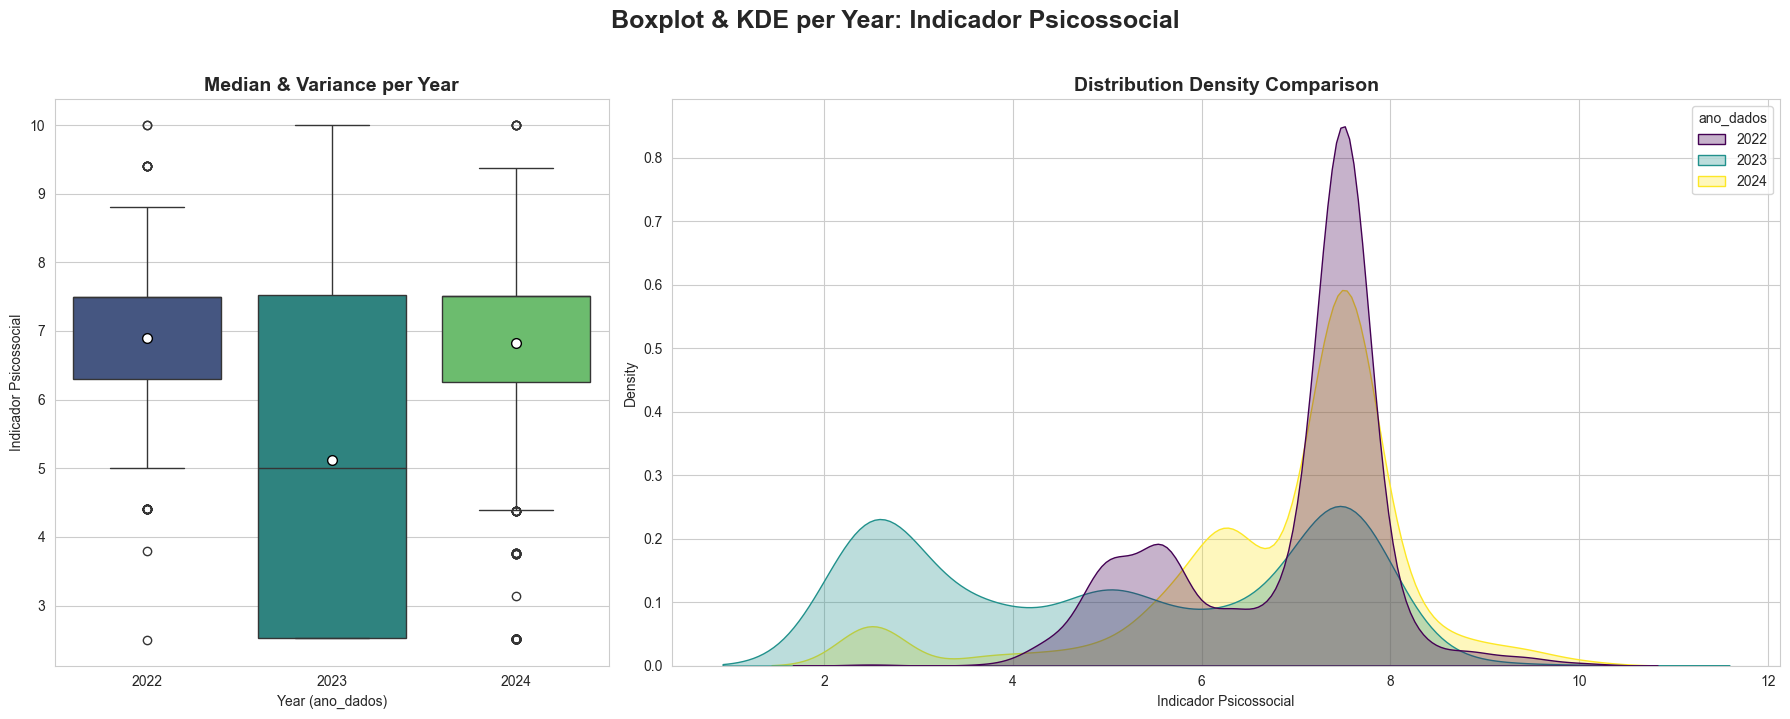

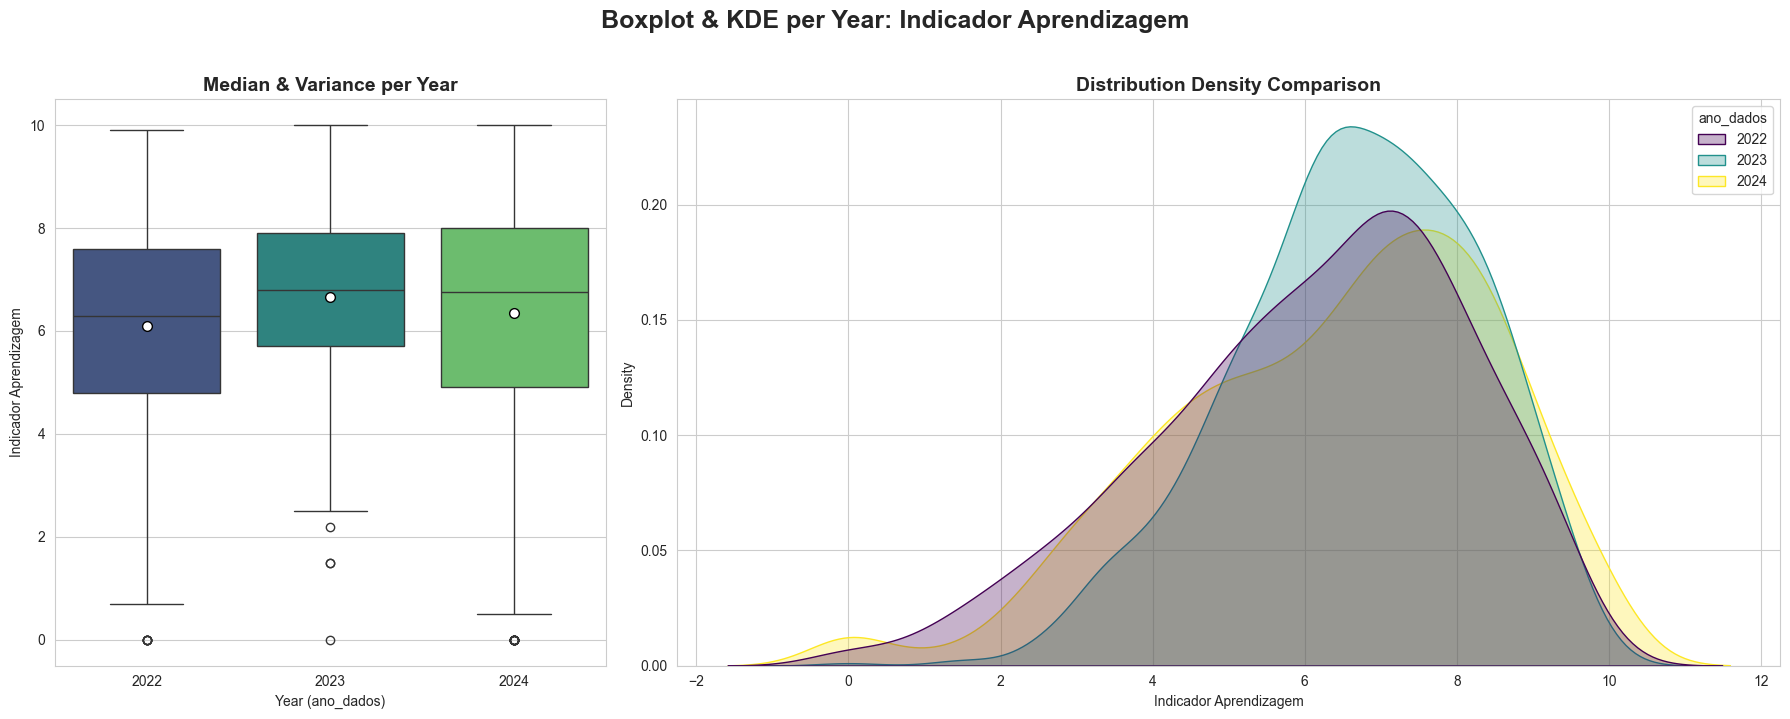

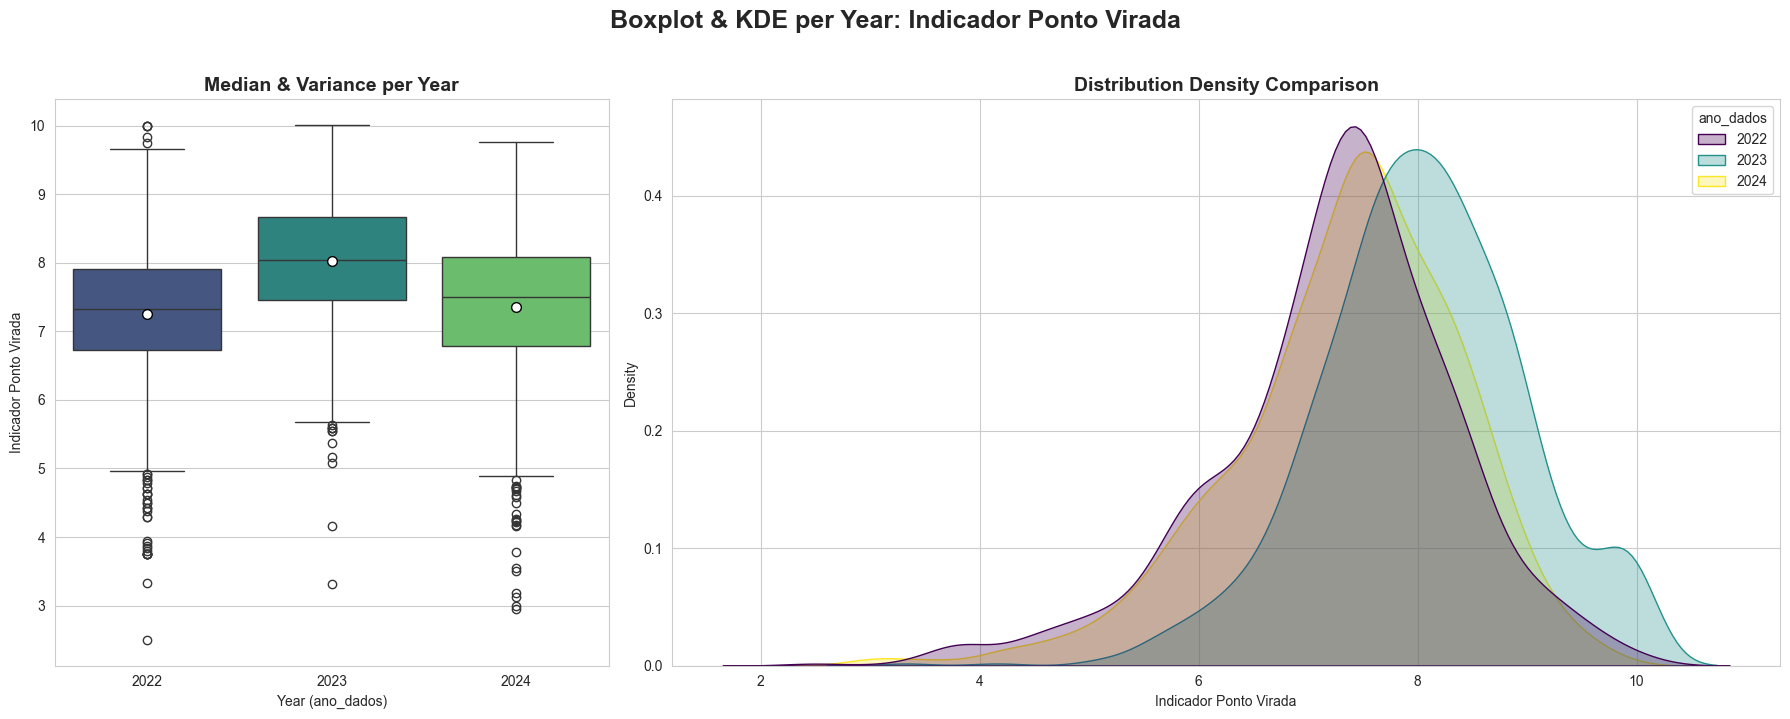

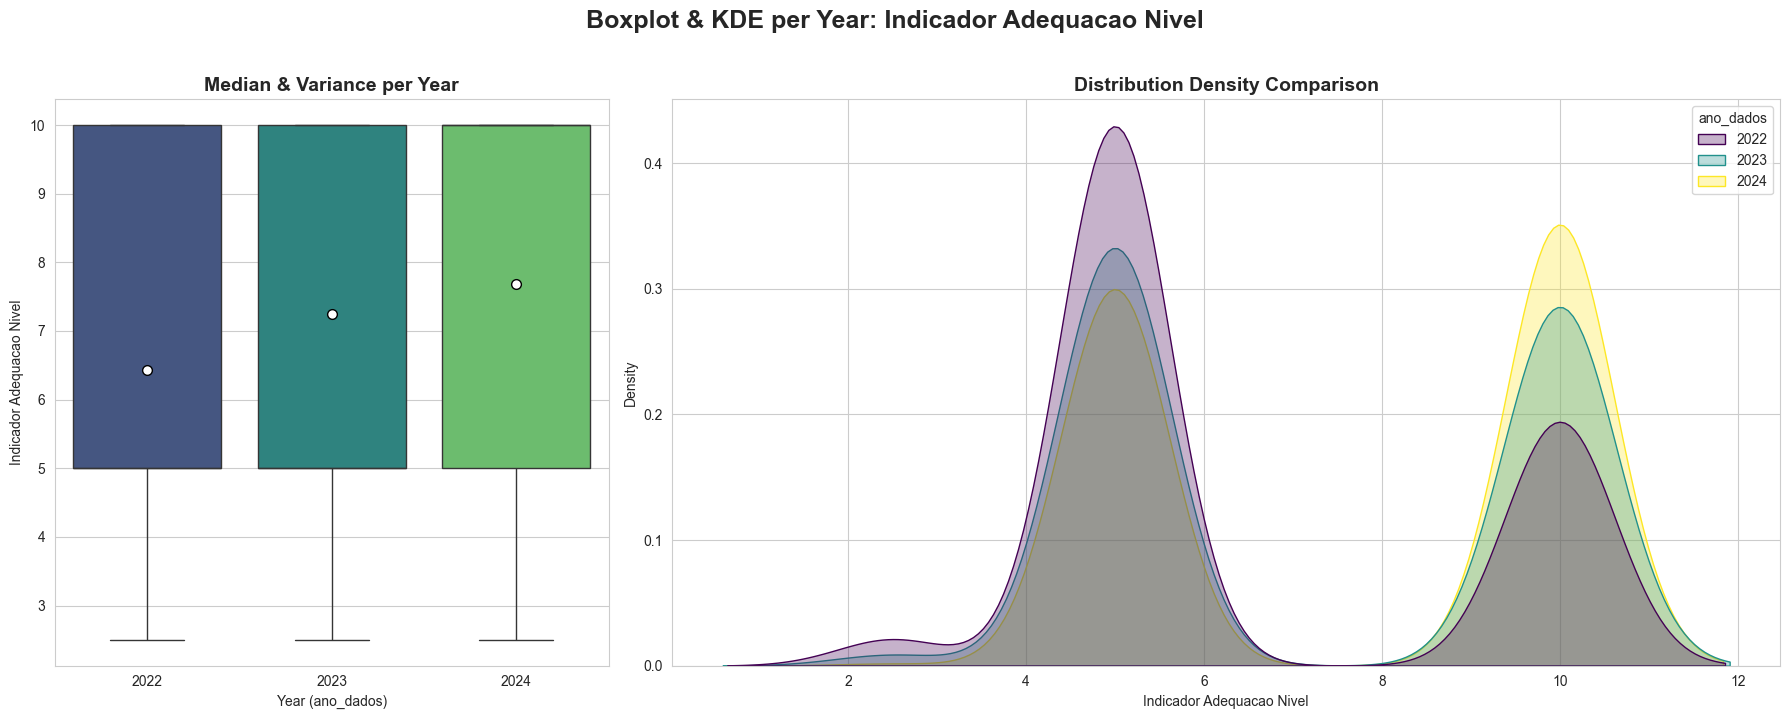

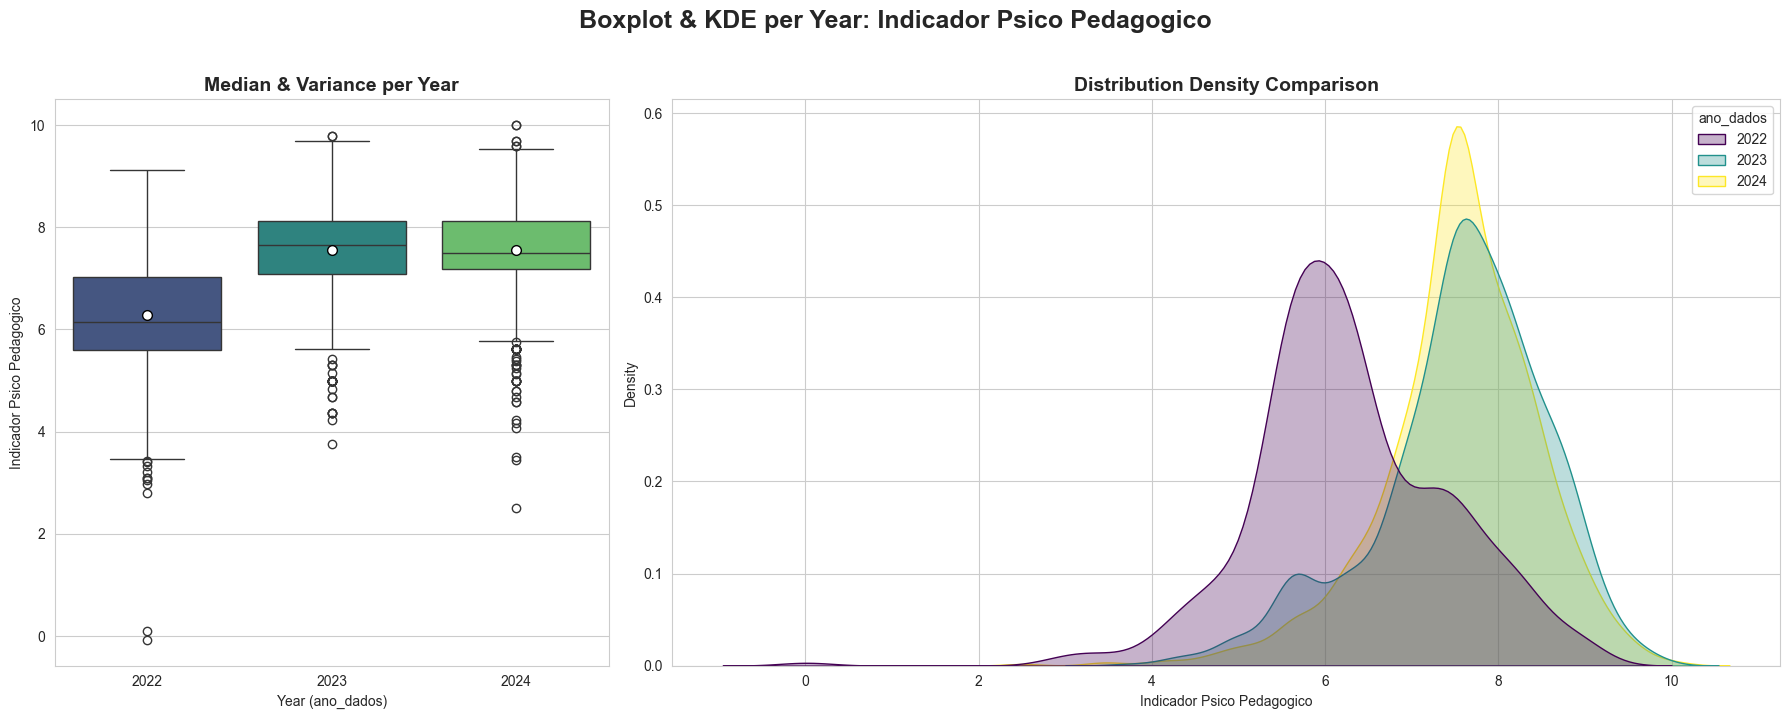

In [8]:
features_to_plot = [col for col in continuous_features if col not in ['RA', 'ano_dados', 'defasagem', 'target_defasagem']]
for col in features_to_plot:
    plot_numerical_univariate_sns(df, col)

**Conclusions from Continuous Features Analysis**
- Overall, most of the distributions remain stable over the years. Some outliers are present across many features and years. We will treat them before feeding the data to our ML models.
- Some interesting patterns:
  - `Indicador Auto Avaliacao` has a significant peak around 8.5-9 in 2024, which could indicate an improvement in how students have been evaluating their own performance over time. In 2023, there was also a considerable peak around 0, suggesting that students were either evaluating themselves much lower on that specific year or maybe a change in measurement methodology.
  - `Indicador Engajamento` displays a peak around lower tiers in 2024 as well. This could either point out to data quality issues for most recent instances or a genuine decrease in engagement.
  - `Indicador Psicossocial` has a dramatically different distribution in 2023 compared to other years. Much wider spread and median around 5.
  - `Indicador Ponto Virada` displays a higher median in 2023, compared to the other years.
  - `Indicador Adequacao Nivel` has bimodal distributions across years. One peak is around 5, while the other is around 10. This might indicate that students are increasingly clustered into two distinct performance groups.

## Target Variable

In [9]:
def plot_defasagem_analysis(df):
    """
    Visualization for the target variable 'defasagem'.
    """
    sns.set_theme(style="whitegrid")
    
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df, 
        x='defasagem', 
        hue='ano_dados', 
        palette='viridis',
        edgecolor='black'
    )
    plt.title('Shift in Academic Lag (Defasagem) Over Years', fontsize=16, fontweight='bold')
    plt.xlabel('Years of Lag (Defasagem)', fontsize=12)
    plt.ylabel('Number of Students', fontsize=12)
    plt.legend(title='Year')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.pointplot(
        data=df, 
        x='ano_dados', 
        y='defasagem', 
        capsize=.1, 
        color='#2980B9', 
        markers="D", 
        linestyles="--"
    )
    plt.title('Average Academic Lag Trend', fontsize=16, fontweight='bold')
    plt.ylabel('Avg Years of Lag', fontsize=12)
    plt.show()

    df_sorted = df.sort_values(by=['RA', 'ano_dados'])
    df_sorted['delta'] = df_sorted['target_defasagem'] - df_sorted['defasagem']
    
    deltas = df_sorted.dropna(subset=['delta'])
    
    plt.figure(figsize=(12, 6))
    
    sns.histplot(
        deltas['delta'], 
        color='#D35400', 
        discrete=True, 
        shrink=0.8
    )
    
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label='No Change')
    
    worsened = (deltas['delta'] < 0).mean() * 100
    improved = (deltas['delta'] > 0).mean() * 100
    static = (deltas['delta'] == 0).mean() * 100
    
    plt.title(f'Year-over-Year Change in Defasagem\n(Left = Worsened, Right = Improved)', fontsize=16, fontweight='bold')
    plt.xlabel('Change in Lag (Years)', fontsize=12)
    plt.xticks(range(int(deltas['delta'].min()), int(deltas['delta'].max()) + 1))
    
    stats_text = (
        f"Improved (Lag Reduced): {improved:.1f}%\n"
        f"Static (No Change): {static:.1f}%\n"
        f"Worsened (Lag Increased): {worsened:.1f}%"
    )
    plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', 
                 fontsize=11, backgroundcolor='white', va='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))
    
    plt.show()


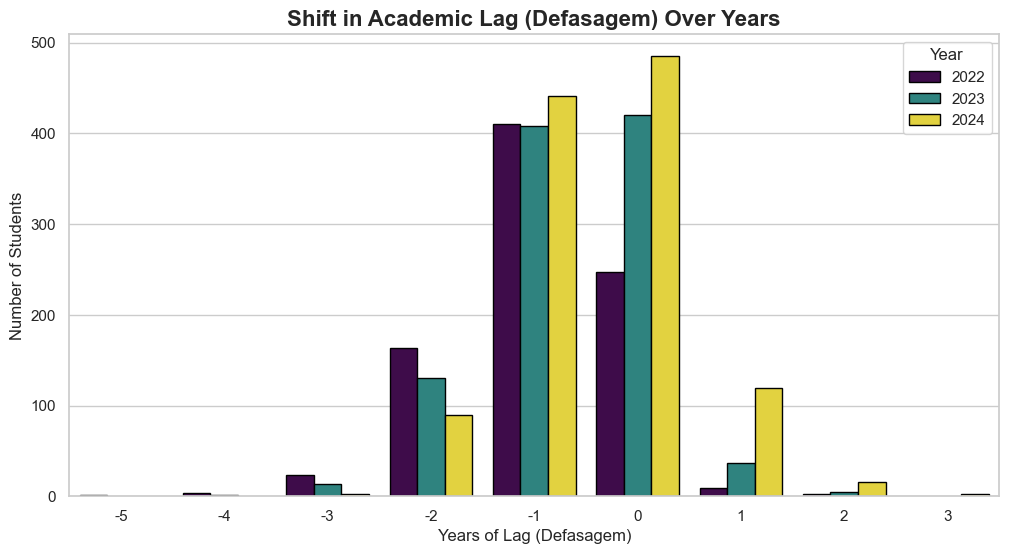

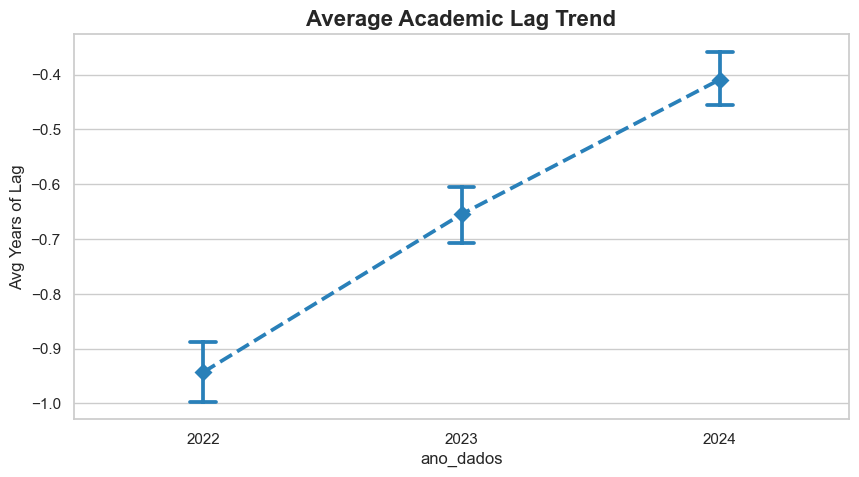

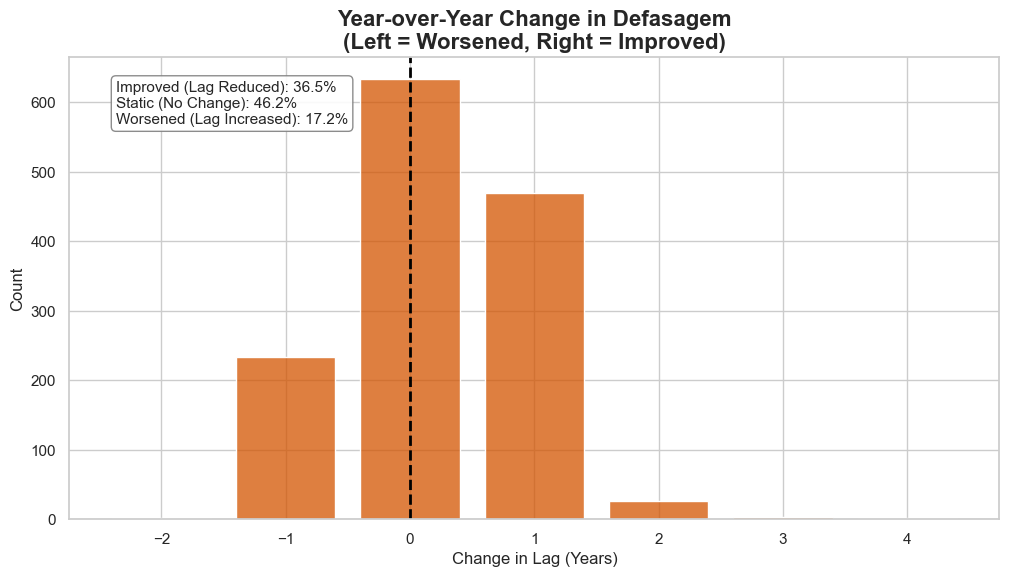

In [10]:
plot_defasagem_analysis(df)

**Conclusions from Target Variable `Defasagem` Analysis**
- Overall, we can see that the program has been successful. 36.5% of students improved their situation, by reducing the *defasagem* lag.
- Average `defasagem` has been going up YoY, reflecting that positive change. 
- In the first graph we can see how number of students behind (<0) keeps reducing YoY, while the concentration of students at 0 increases from 2022 to 2024.

## Correlation

In [11]:
def plot_correlation_heatmap(df):
    "Plots a correlation heatmap for features"
    pedra_map = {
        'Quartzo': 1,
        'Ágata': 2,
        'Ametista': 3,
        'Topázio': 4
    }
    
    df_plot = df.copy()
    if 'pedra_atual' in df_plot.columns:
        df_plot['pedra_ordinal'] = df_plot['pedra_atual'].map(pedra_map)

    cols_to_corr = [
        'defasagem',
        'inde_atual',
        'pedra_ordinal',
        'indicador_aprendizagem',
        'indicador_ponto_virada',
        'indicador_auto_avaliacao',
        'indicador_engajamento',
        'indicador_psicossocial',
        'indicador_psico_pedagogico',
        'indicador_adequacao_nivel',
        'idade',
        'anos_na_instituicao'
    ]

    existing_cols = [c for c in cols_to_corr if c in df_plot.columns]
    corr_df = df_plot[existing_cols].select_dtypes(include=[np.number])

    corr_matrix = corr_df.corr()

    plt.figure(figsize=(14, 12))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(
        corr_matrix, 
        mask=mask,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        center=0,
        vmin=-1, vmax=1,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )

    plt.title('Correlation Heatmap: Educational Indicators vs. Defasagem', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

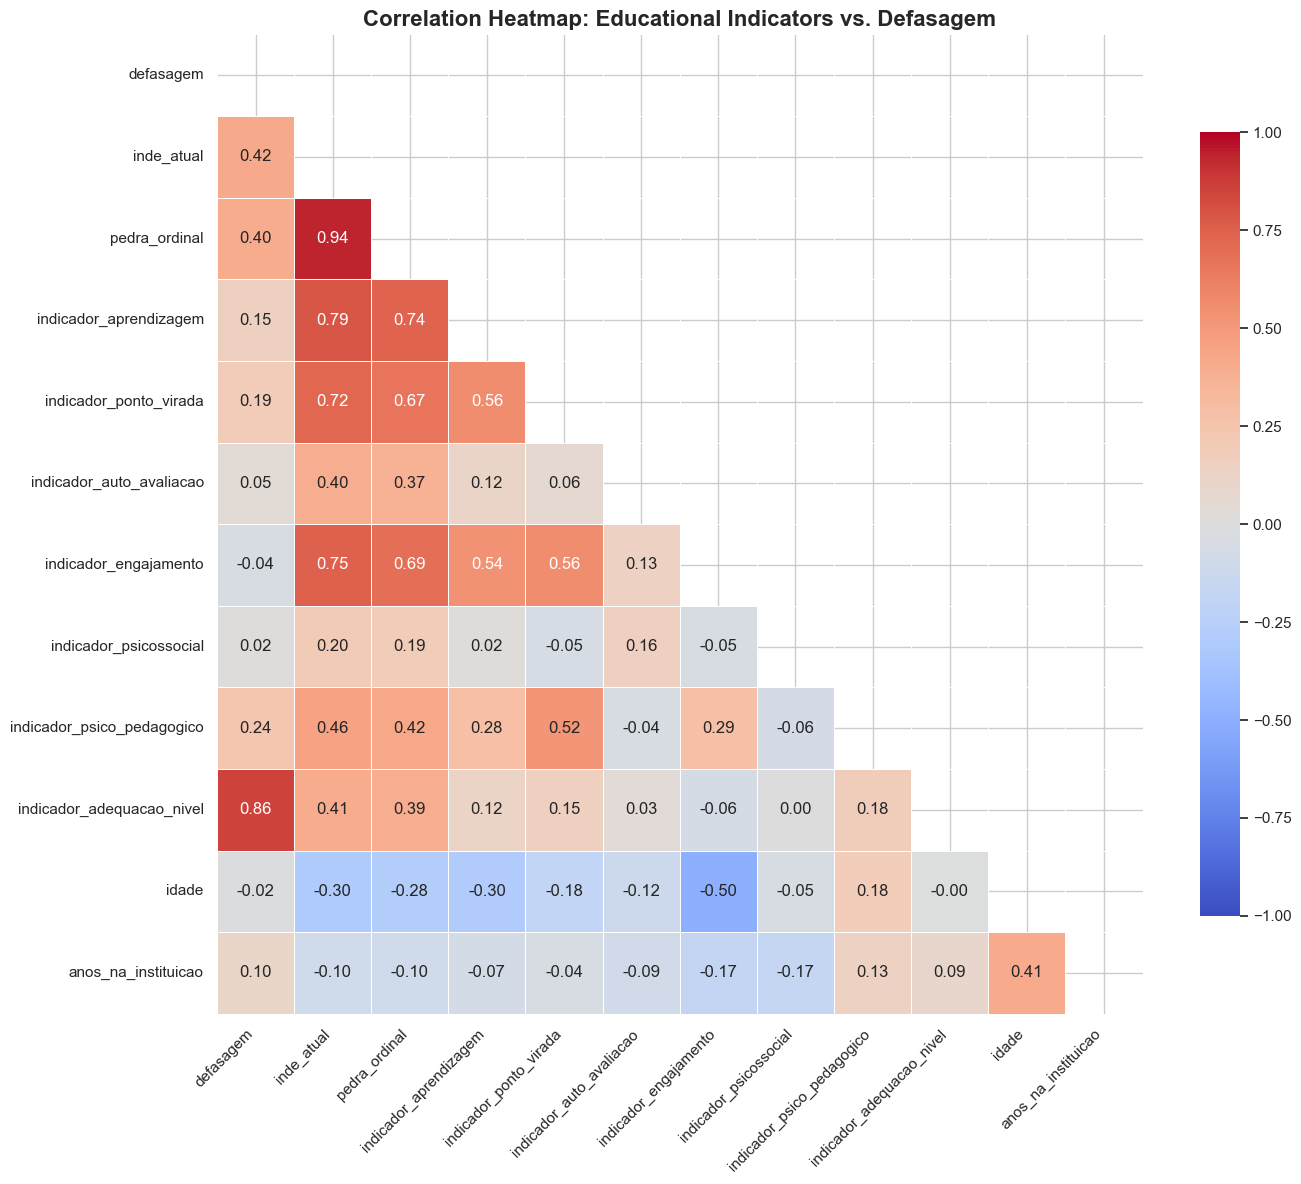

In [12]:
plot_correlation_heatmap(df)

**Conclusions from Correlation Heatmap Analysis**

- `indicador_adequacao_nivel` appears to be the strongest predictor of `defasagem` with a correlation of 0.86.
- Besides that, `inde_atual` appears to have a slightly positive correlation with our target variable as well (0.42).
- When it comes to multicollinearity, `inde_atual` and `pedra_ordinal` are almost perfect correlated at 0.94. We'll drop the `pedra_atual` feature when modeling, because it would introduce redundancy to the model, given it derives from `inde_atual`. `inde_atual` will be kept because it is a continuous feature, which could contain more relevant signal.
- When it comes to demographics, `idade` has a significant negative corrrelation with `indicator_engajamento` at -0.5. This would suggest that older students show lower engagement. Age also negatively correlates with `inde_atual` (-0.3), meaning that older students tend to also perform worse. 

## Missing Data

In [13]:
display(df.query('target_defasagem.isna()'))
print('-' * 20)
print("Distribution of Missing Target Defasagem by Year:")
display(df.query('target_defasagem.isnull()')['ano_dados'].value_counts())
print('-' * 20)
print("Overall Distribution of Records by Year:")
display(df['ano_dados'].value_counts())

,RA,ano_dados,fase,idade,genero,anos_na_instituicao,instituicao,pedra_atual,inde_atual,indicador_auto_avaliacao,indicador_engajamento,indicador_psicossocial,indicador_aprendizagem,indicador_ponto_virada,indicador_adequacao_nivel,indicador_psico_pedagogico,defasagem,target_defasagem
2,1,2024,8,21,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,0,NaN
5,2,2024,8,19,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,0,NaN
6,3,2022,7,17,F,6,Privada,Ágata,6.591,0.0,7.9,5.6,5.6,7.556,10.0,8.198,0,NaN
7,4,2022,7,17,M,5,Privada,Quartzo,5.951,8.8,4.5,5.6,5.0,5.278,10.0,5.554,0,NaN
9,5,2023,8,18,F,7,Bolsista,None,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,1657,2024,9,20,M,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3026,1658,2024,9,21,M,3,Privada,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3027,1659,2024,9,21,M,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN
3028,1660,2024,9,24,F,3,Bolsista,None,NaN,NaN,0.0,NaN,NaN,NaN,10.0,NaN,1,NaN


--------------------
Distribution of Missing Target Defasagem by Year:


ano_dados
2024    1156
2022     256
2023     249
Name: count, dtype: int64

--------------------
Overall Distribution of Records by Year:


ano_dados
2024    1156
2023    1014
2022     860
Name: count, dtype: int64

**Conclusions from Missing Data Analysis**
- All 2024 rows are NaN. This is expected, since `target_defasagem` represents the lag values for 2025, data we **don't have**.
- We can infer that the 256 and 249 NaN students from 2022 and 2023 respectively are those who haven't returned the following year.

## Conclusion

This brief EDA allowed us to gain some insights into student demography and performance. We've been able to measure that the program appears to be effective in decreasing academic lagging (defasagem) among its participants. 

This EDA also provided relevant findings for the modeling step. Some features, such as `pedra_atual`, can be dropped in favor of `inde_atual`. 

The `inde_atual` feature displays significant correlations with other indicators (e.g., `indicador_aprendizagem`, `indicador_engajamento`). That's expected, since INDE is *a weighted average of indicators*, as explained in the original data source. During modeling, we will test whether we achieve better predicting performance by using `inde_atual` alone or the indicators alone, without INDE. 

We have also been able to assess that some categorical features will require encoding (i.e., transforming from categorical to numeric values). Boxplots and KDEs also allowed us to see that continuous features have some outliers, which we'll treat in the modeling pipeline.